### DAA algorithms implementation in Python
 - Deepak Srivas

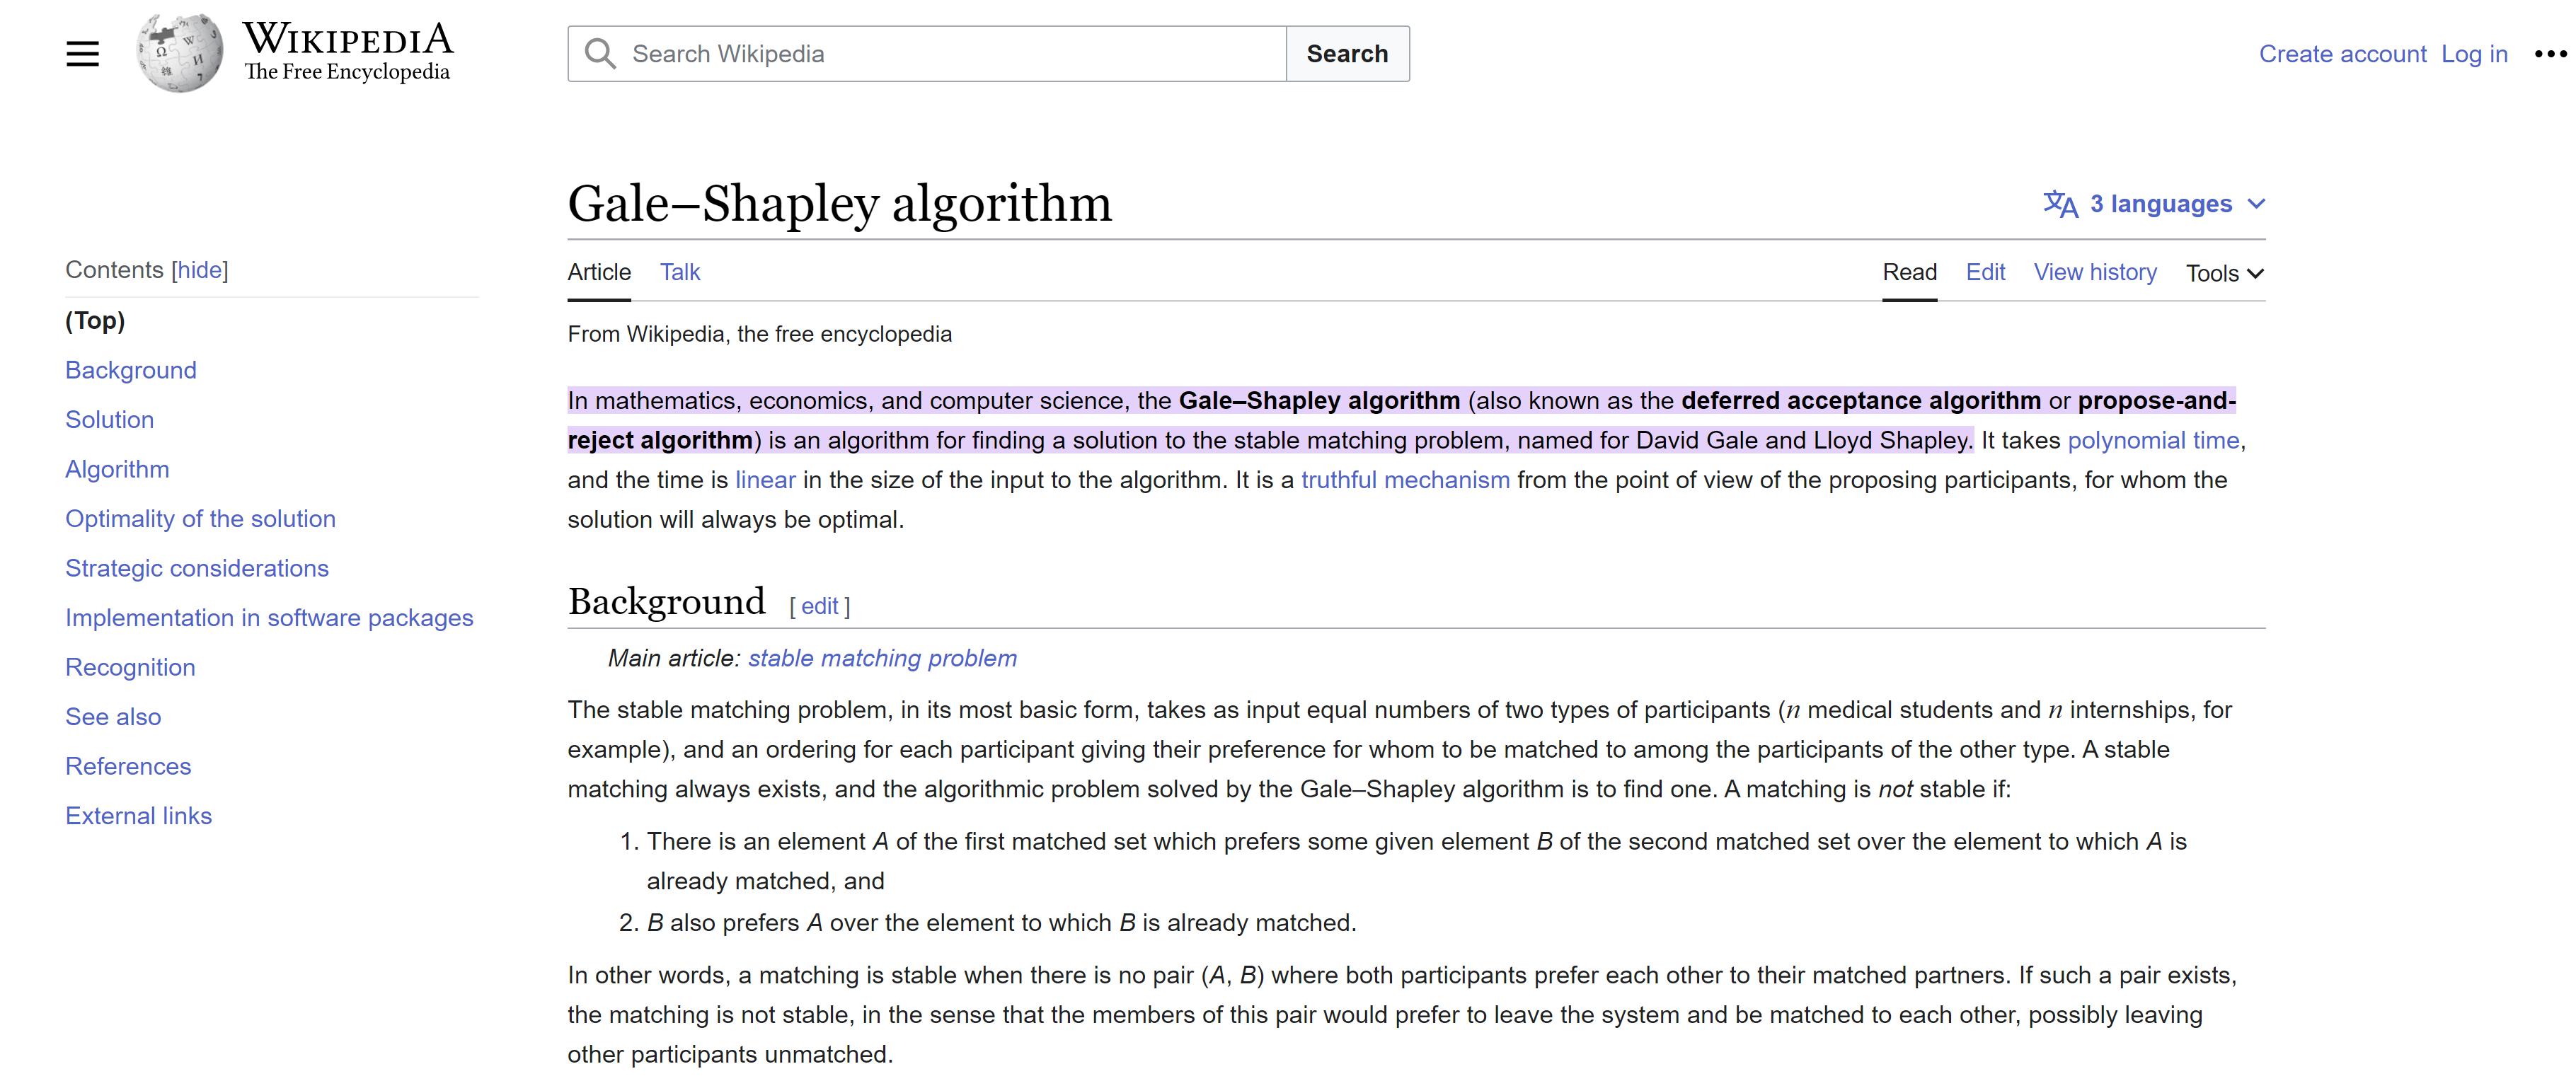
https://en.wikipedia.org/wiki/Gale%E2%80%93Shapley_algorithm

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Initializing the name of men and women (we are taking case of equal number of men and women)
men_list = ['M1', 'M2', 'M3','M4']
women_list = ['W1', 'W2', 'W3','W4']

In [3]:
#The dataframe contains the preference ranking of women, value at ith row and jth column indicate the rank of ith men
# for jth women preference. For example in table below W1 has preference M2>M1>M3>M4 thus M2 has highest rank
women_df = pd.DataFrame({'W1': [2,1,3,4], 'W2': [2,3,4,1], 'W3':[1,3,2,4], 'W4':[1,3,2,4]})
women_df.index = men_list
women_df

,W1,W2,W3,W4
M1,2,2,1,1
M2,1,3,3,3
M3,3,4,2,2
M4,4,1,4,4


In [4]:
#Similarly initializing preference of men
men_df = pd.DataFrame({'M1': [2,1,3,4], 'M2': [1,3,2,4], 'M3':[1,3,2,4], 'M4':[1,4,2,3]})
men_df.index = women_list
men_df

,M1,M2,M3,M4
W1,2,1,1,1
W2,1,3,3,4
W3,3,2,2,2
W4,4,4,4,3


We will be using the above preferences to explain the code. In summary these are the preference profiles for men and women

For men:
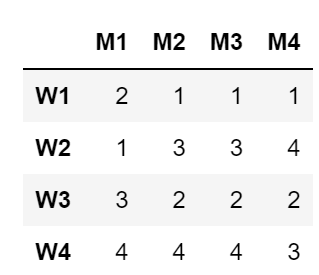

For women:
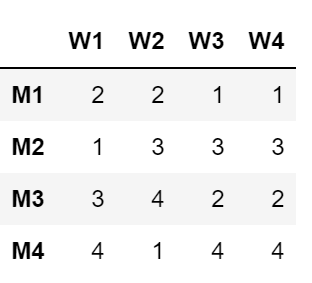

In [5]:
#partner_rank(W3,M2) will represent ranking of M2 in the preference of W3
def partner_rank(rank_by, rank_of):
    n1=int(rank_by[-1])
    n2=int(rank_of[-1])
    result=-10
    if rank_by[0]=='W' and rank_of[0]=='M':
        result=women_df.iloc[n2-1,n1-1]
    if rank_by[0]=='M' and rank_of[0]=='W':
        result=men_df.iloc[n2-1,n1-1]
    return result
partner_rank('W2', 'M1')
#Thus we see that for W2 the preference order was M4>M1>M2>M3 for the given example thus M1 is ranked 2nd

2

In [6]:
def proposing_mens_f(men_availibility):
    proposing_mens=[]
    for i in men_availibility:
        if men_availibility[i]==True:
            proposing_mens.append(i)
    if len(proposing_mens)==0:
        print("All mens are paired")
    else:
        print("Men who will propose in this iterations are: ",proposing_mens)
    return proposing_mens

def proposals_f(proposing_mens):
    proposals = defaultdict(list)
    for i in proposing_mens:
        proposals[men_df[i].idxmin()].append(i)
        print(i, ' to ', men_df[i].idxmin())    
    print('Proposals: ', dict(proposals))
    return dict(proposals)

def accepted_proposals(proposals,men_availibility):
    pair={}
#     print("Men" ,men_availibility)
    for women in proposals:
        pair[women]=proposals[women][0]
        men_availibility[pair[women]]=False
        for i in proposals[women]:
#             print(women, " proposed by ", i)
            if partner_rank(women,i) < partner_rank(women,pair[women]):
                men_availibility[pair[women]]=True
                print(women, "rejects",pair[women])
                men_df[pair[women]][women]=len(women_df)+5
                pair[women]=i
                men_availibility[i]=False
            if partner_rank(women,i) > partner_rank(women,pair[women]):
                men_df[i][women]=len(women_df)+5
                print(women, "rejects",i)
    print("Accepted proposals: ", pair)
    return pair


In [7]:
# 2 stable matchings obtained when either men or women proposes to their preferences
# Men proposing first
from collections import defaultdict
final_matching={}
men_availibility = {}
for i in men_list:
    #All men are initially available
    men_availibility[i]=True
    
matching=[]
proposing_mens = proposing_mens_f(men_availibility)
while len(proposing_mens)>0:
    proposals=proposals_f(proposing_mens)
    matching.append(accepted_proposals(proposals,men_availibility))
    print("____________________________________________________________________________")
    proposing_mens = proposing_mens_f(men_availibility)
    
print()
print()
print("____________________________________________________________________________")
print("Final Matching")
print(matching)

Men who will propose in this iterations are:  ['M1', 'M2', 'M3', 'M4']
M1  to  W2
M2  to  W1
M3  to  W1
M4  to  W1
Proposals:  {'W2': ['M1'], 'W1': ['M2', 'M3', 'M4']}
W1 rejects M3
W1 rejects M4
Accepted proposals:  {'W2': 'M1', 'W1': 'M2'}
____________________________________________________________________________
Men who will propose in this iterations are:  ['M3', 'M4']
M3  to  W3
M4  to  W3
Proposals:  {'W3': ['M3', 'M4']}
W3 rejects M4
Accepted proposals:  {'W3': 'M3'}
____________________________________________________________________________
Men who will propose in this iterations are:  ['M4']
M4  to  W4
Proposals:  {'W4': ['M4']}
Accepted proposals:  {'W4': 'M4'}
____________________________________________________________________________
All mens are paired


____________________________________________________________________________
Final Matching
[{'W2': 'M1', 'W1': 'M2'}, {'W3': 'M3'}, {'W4': 'M4'}]


### This was the implementation of DAA in python to get stable matching